# Corona Virus Exploratory Analysis and Modeling 

![](https://cdn.cnn.com/cnnnext/dam/assets/200130165125-corona-virus-cdc-image-super-tease.jpg)

In [1]:
# System
import sys
import os
import operator
import argparse
import itertools

# Time
import time
import datetime
from datetime import datetime
from time import gmtime, strftime
from pytz import timezone

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score



# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model
import keras
from keras import models
from keras.models import Model
from keras.models import load_model
from keras.models import Sequential

# Deep Learning - Keras - Layers
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPool2D, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D

from keras.regularizers import l2

# Deep Learning - Keras - Pretrained Models
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetMobile, NASNetLarge

from keras.applications.nasnet import preprocess_input

# Deep Learning - Keras - Model Parameters and Evaluation Metrics
from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy

# Deep Learning - Keras - Visualisation
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau, LearningRateScheduler
# from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

# Deep Learning - TensorFlow
import tensorflow as tf


# Graph/ Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

import seaborn as sns

# from mlxtend.plotting import plot_confusion_matrix
import plotly.express as px
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
# from wordcloud import WordCloud

# Image
# import cv2
from PIL import Image

from IPython.display import display
from IPython.core.display import HTML


# np.random.seed(42)

%matplotlib inline

# Input data
# print(os.listdir("../input/"))

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.
C:\Users\Andromeda\Anaconda3\lib\site-packages\ipykernel_launcher.py:101: MatplotlibDeprecationWarning:


The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.



In [2]:
def print_time():
    fmt = "%a, %d %B %Y %H:%M:%S %Z%z"
    
    pacific = timezone('US/Pacific')
    
    loc_dt = datetime.now(pacific)
    
    time_str = loc_dt.strftime(fmt)
    
    print("Pacific Time" + " : " + time_str)
    
    return time_str
    
def get_cur_time():
    fmt = "%a, %d %B %Y %H:%M:%S %Z%z"
    
    pacific = timezone('UTC')
    
    loc_dt = datetime.now(pacific)
    
    time_str = loc_dt.strftime(fmt)
    
    return time_str  

In [3]:
def format_date_columns(data_cols):
    data_cols_new_format = []
    data_cols_map = {}
    
    for d in data_cols:
        new_d = datetime.strftime(datetime.strptime(d, '%m/%d/%y'),'%b %d')
        data_cols_map[d] = new_d
        data_cols_new_format.append(new_d)
    
    return data_cols_new_format, data_cols_map

In [4]:
cur_time_str = print_time()

Pacific Time : Thu, 14 May 2020 09:32:59 PDT-0700


In [5]:
input_dir = "C:\\Users\\Andromeda\\Programming\\GitHub\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\"

# input_dir = "../input/corona-virus-time-series-dataset/COVID-19/csse_covid_19_data/csse_covid_19_time_series/"
# input_dir = "../input/novel-corona-virus-2019-dataset/"

In [6]:
os.listdir(input_dir)

['.gitignore',
 'Errata.csv',
 'README.md',
 'time_series_covid19_confirmed_global.csv',
 'time_series_covid19_confirmed_US.csv',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_deaths_US.csv',
 'time_series_covid19_recovered_global.csv']

In [7]:
current_dir = os.getcwd() + "\\"

output_dir = current_dir + "output\\"
output_csv_dir = output_dir + "csv\\"

output_visualization_dir = output_dir + "visualization\\"

output_visualization_dir_global = output_visualization_dir + "global\\"
output_visualization_dir_country = output_visualization_dir + "country\\"

try:
    os.mkdir(output_dir)
except:
    print("Could not create " + output_dir)

try:
    os.mkdir(output_csv_dir)
except:
    print("Could not create " + output_csv_dir)

try:
    os.mkdir(output_visualization_dir)
except:
    print("Could not create " + output_visualization_dir)


try:
    os.mkdir(output_visualization_dir_global)
except:
    print("Could not create " + output_visualization_dir_global)
    
    
try:
    os.mkdir(output_visualization_dir_country)
except:
    print("Could not create " + output_visualization_dir_country)

In [8]:
ts_confirmed_global = pd.read_csv(input_dir + "time_series_covid19_confirmed_global.csv")
ts_recovered_global = pd.read_csv(input_dir + "time_series_covid19_recovered_global.csv")
ts_deaths_global    = pd.read_csv(input_dir + "time_series_covid19_deaths_global.csv")

ts_confirmed_US = pd.read_csv(input_dir + "time_series_covid19_confirmed_US.csv")
ts_deaths_US    = pd.read_csv(input_dir + "time_series_covid19_deaths_US.csv")

In [9]:
for country in ts_confirmed_global["Country/Region"].unique().tolist():
    c = re.sub(r'[^a-zA-Z0-9]', '', country)
    try:
        os.mkdir(output_visualization_dir_country + c)    
    except:
        print("Could not make "+ country + " folder")

In [10]:
columns = ts_confirmed_global.columns.tolist()
location_columns = ['Province/State', 'Country/Region', 'Lat', 'Long']
location_long_lat_columns = ['Lat', 'Long']
location_name_cols = ['Country/Region', 'Province/State']

data_cols = [c for c in columns if c not in location_columns]

count_days = len(data_cols)

In [11]:
data_cols_new_format, data_cols_map = format_date_columns(data_cols)

data_cols_new_format = data_cols

last_day = data_cols_new_format[-1]
prev_day = data_cols_new_format[-2]

new_cols = location_name_cols + [last_day]

countries = ts_confirmed_global["Country/Region"].unique().tolist()

copyright_text = "@Anjana Tiha \n(anjana.tiha@gmail.com) \n[" + print_time() + "]"
copyright_text = "@Anjana Tiha"
copyright_text_size = 8

Pacific Time : Thu, 14 May 2020 09:33:01 PDT-0700


In [12]:
df_confirmed_total = ts_confirmed_global[data_cols_new_format].sum()
df_recovered_total = ts_recovered_global[data_cols_new_format].sum()
df_death_total = ts_deaths_global[data_cols_new_format].sum()

df_confirmed_pct_1_total = df_confirmed_total.pct_change(periods=1)*100
df_recovered_pct_1_total = df_recovered_total.pct_change(periods=1)*100
df_death_pct_1_total = df_death_total.pct_change(periods=1)*100

df_closed_total = df_recovered_total + df_death_total
df_active_total = df_confirmed_total - df_closed_total

df_death_rate_closed_total = (df_death_total / df_closed_total) * 100
df_recovery_rate_closed_total = (df_recovered_total / df_closed_total) * 100

df_death_rate_total = (df_death_total / df_confirmed_total) * 100
df_recovery_rate_total = (df_recovered_total / df_confirmed_total) * 100


In [13]:
df_confirmed_country = ts_confirmed_global.groupby(["Country/Region"]).sum().reset_index()
df_recovered_country = ts_recovered_global.groupby(["Country/Region"]).sum().reset_index()
df_death_country = ts_deaths_global.groupby(["Country/Region"]).sum().reset_index()

# df_confirmed_pct_1_country = df_confirmed_country.pct_change(periods=1)*100
# df_recovered_pct_1_country = df_recovered_country.pct_change(periods=1)*100
# df_death_pct_1_country = df_death_country.pct_change(periods=1)*100

# df_closed_country = df_recovered_country + df_death_country
# df_active_country = df_confirmed_country - df_closed_country

# df_death_rate_closed_country  = (df_death_country / df_closed_country) * 100
# df_recovery_rate_closed_country  = (df_recovered_country / df_closed_country) * 100

# df_death_rate_country  = (df_death_country / df_confirmed_country) * 100
# df_recovery_rate_country  = (df_recovered_country / df_confirmed_country) * 100


In [14]:
df_country = pd.DataFrame()
df_country["Country"] = ts_confirmed_global["Country/Region"].unique().tolist()
df_country["Comfirmed"] = df_country["Country"].apply(lambda x: df_confirmed_country[df_confirmed_country["Country/Region"]==x][last_day].values[0])
df_country["Recovered"] = df_country["Country"].apply(lambda x: df_recovered_country[df_recovered_country["Country/Region"]==x][last_day].values[0])
df_country["Death"] = df_country["Country"].apply(lambda x: df_death_country[df_death_country["Country/Region"]==x][last_day].values[0])
df_country["Closed"] = df_country["Recovered"] + df_country["Death"]
df_country["Active"] = df_country["Comfirmed"] - df_country["Closed"]
df_country["Death Rate (Closed)"] = (df_country["Death"] / df_country["Closed"]) * 100
df_country["Recovery Rate (Closed)"] = (df_country["Recovered"] / df_country["Closed"]) * 100
df_country["Death Rate "] = (df_country["Death"] / df_country["Comfirmed"]) * 100
df_country["Recovery Rate "] = (df_country["Recovered"] / df_country["Comfirmed"]) * 100
df_country.to_csv(output_csv_dir +"country.csv")

In [15]:
# !pip install itables
# !pip install countryinfo


# import itables.interactive
# from itables import show

# from countryinfo import CountryInfo

In [16]:
# show(df_country)

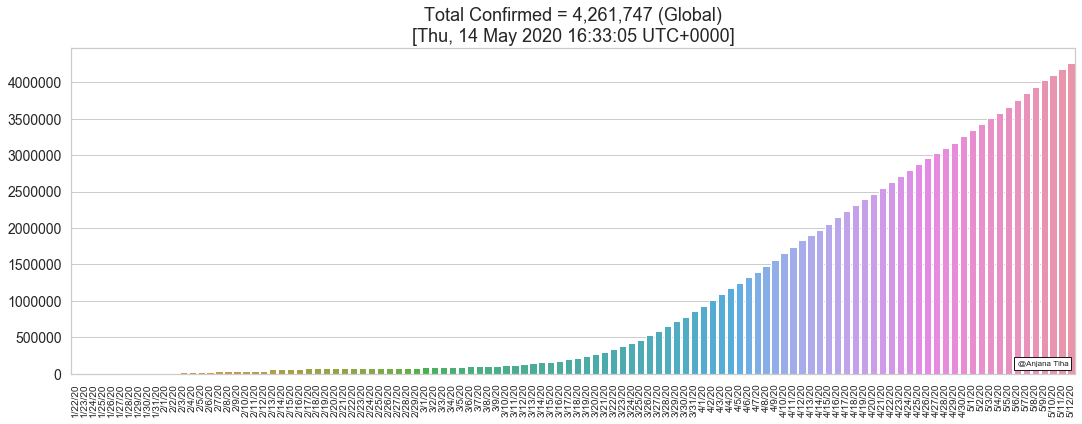

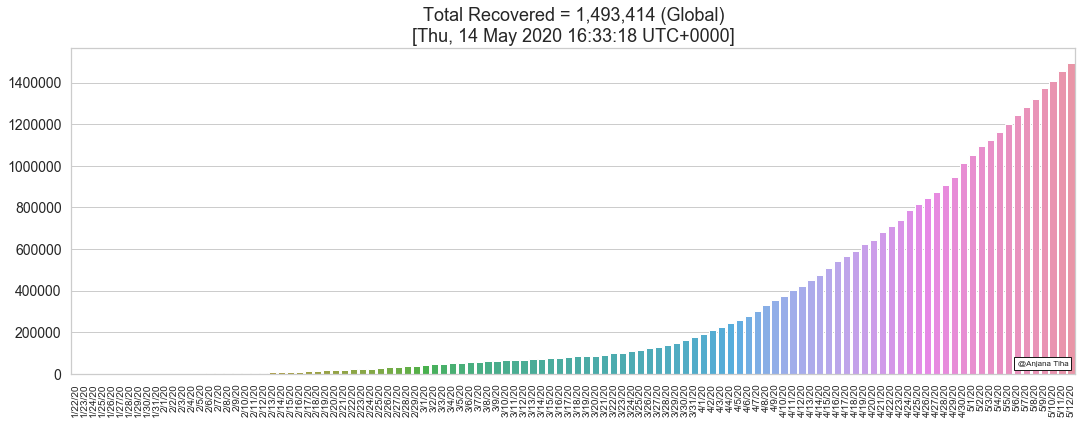

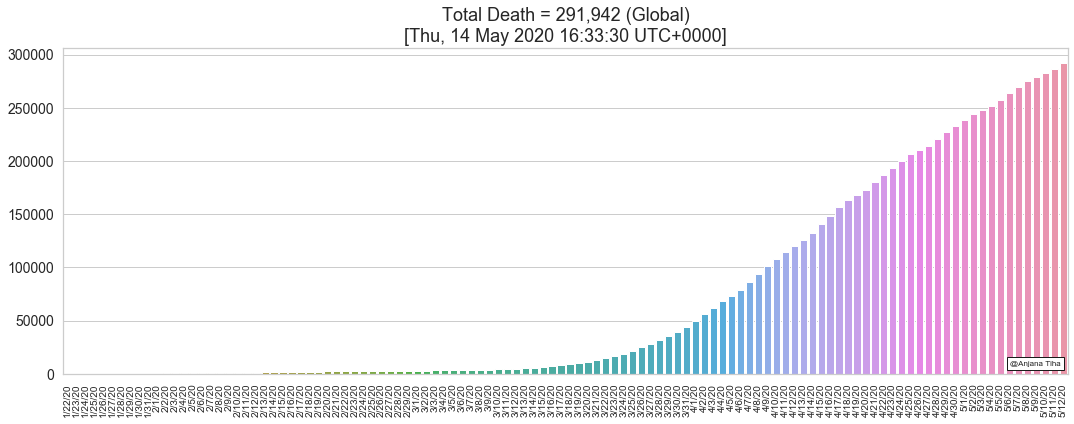

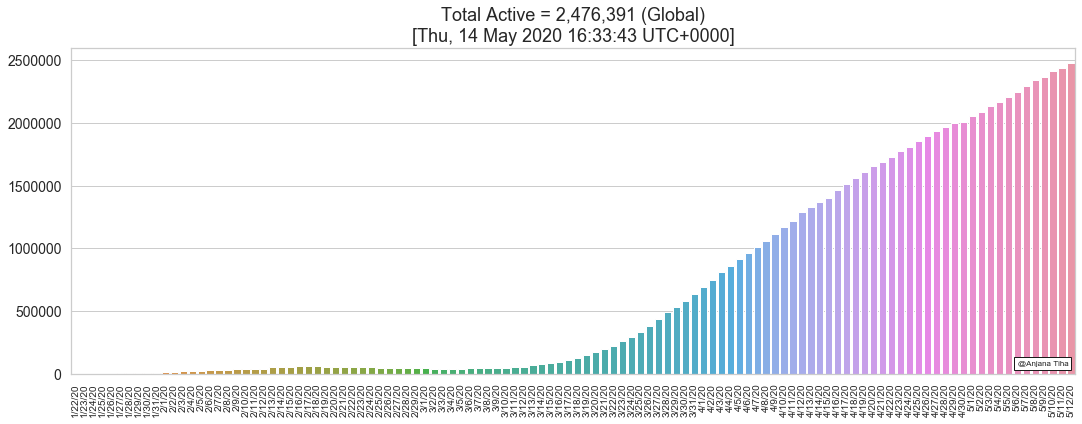

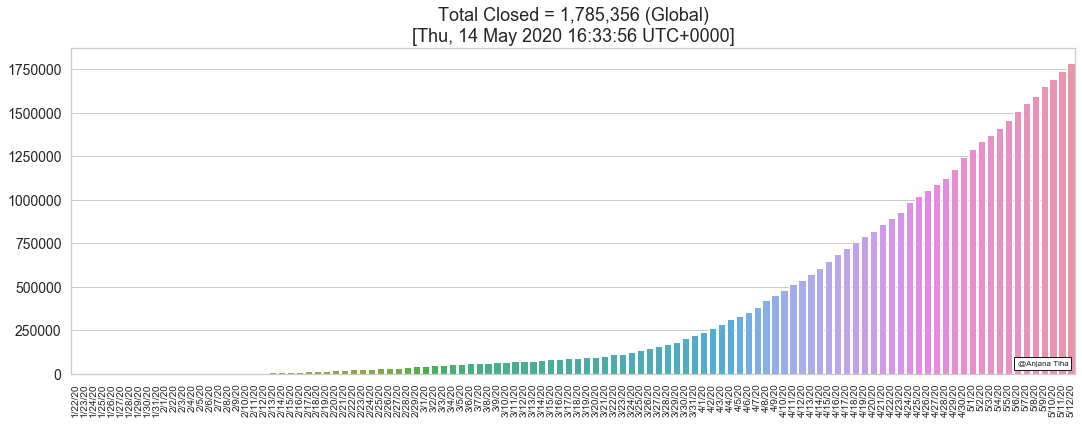

In [17]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize + 4}

plt.rcParams.update(params)



filename = output_visualization_dir_global + "confirmed_global.png"    

if os.path.exists(filename):
    os.remove(filename)

ax = sns.barplot(x=data_cols_new_format, y=df_confirmed_total)
plt.title("Total Confirmed = " + f'{df_confirmed_total[last_day]:,}' +" (Global)" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "recovered_global.png"    

if os.path.exists(filename):
    os.remove(filename)

ax = sns.barplot(x=data_cols_new_format, y=df_recovered_total)
plt.title("Total Recovered = " + f'{df_recovered_total[last_day]:,}' +" (Global)"+ "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "death_global.png"    

if os.path.exists(filename):
    os.remove(filename)


ax = sns.barplot(x=data_cols_new_format, y=df_death_total)
plt.title("Total Death = " + f'{df_death_total[last_day]:,}' +" (Global)" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "active_global.png"    

if os.path.exists(filename):
    os.remove(filename)

ax = sns.barplot(x=data_cols_new_format, y=df_active_total)
plt.title("Total Active = " + f'{df_active_total[last_day]:,}' +" (Global)" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "closed_global.png"    

if os.path.exists(filename):
    os.remove(filename)

ax = sns.barplot(x=data_cols_new_format, y=df_closed_total)
plt.title("Total Closed = " + f'{df_closed_total[last_day]:,}' +" (Global)" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


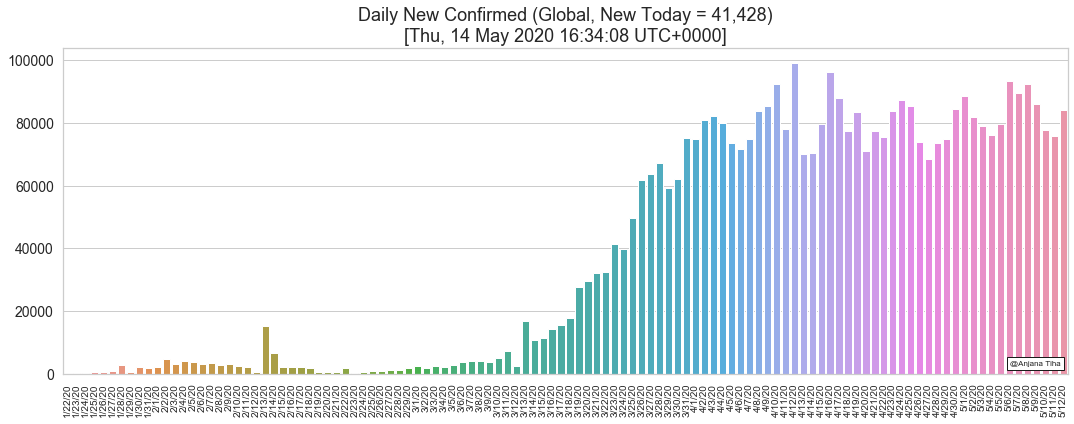

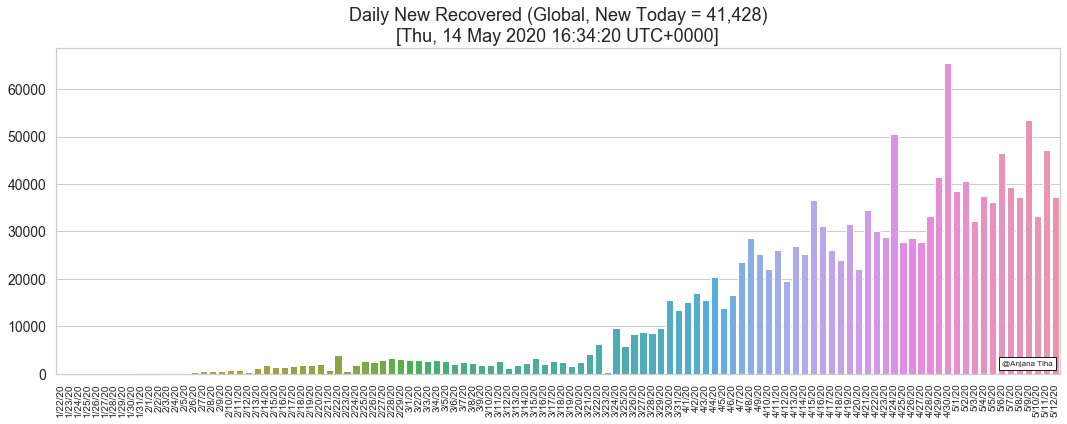

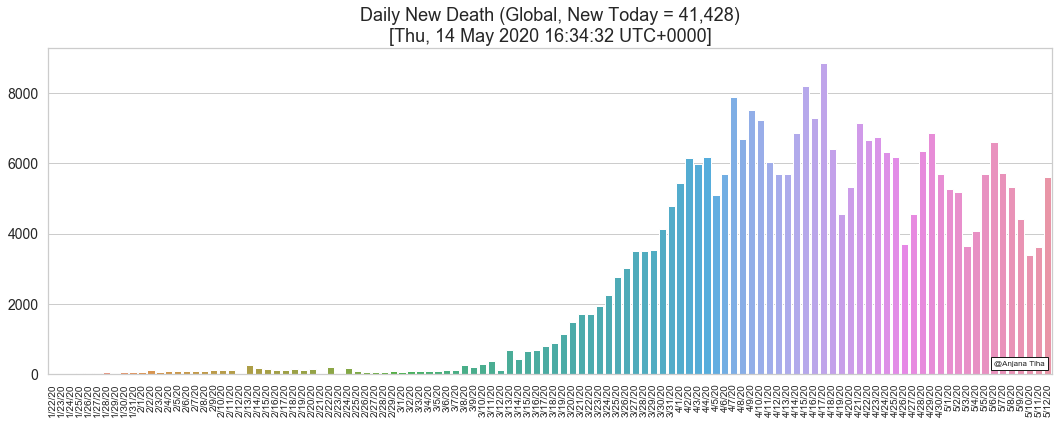

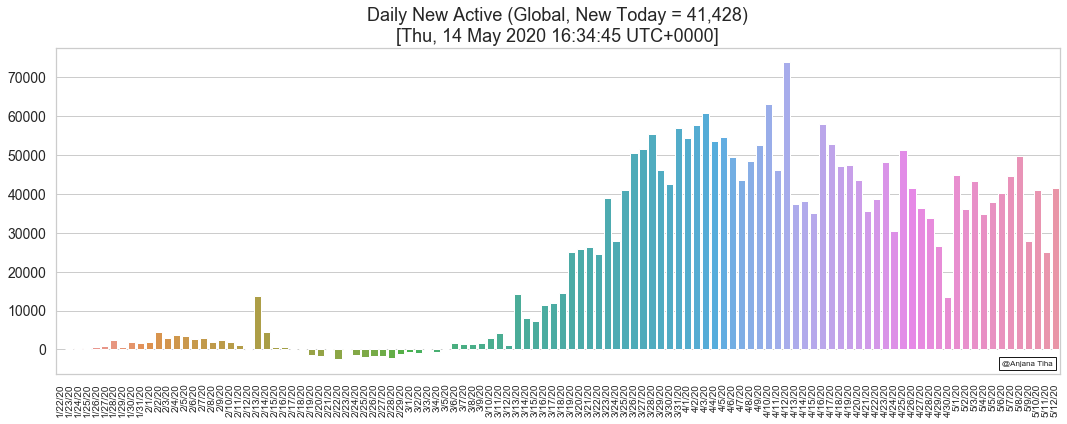

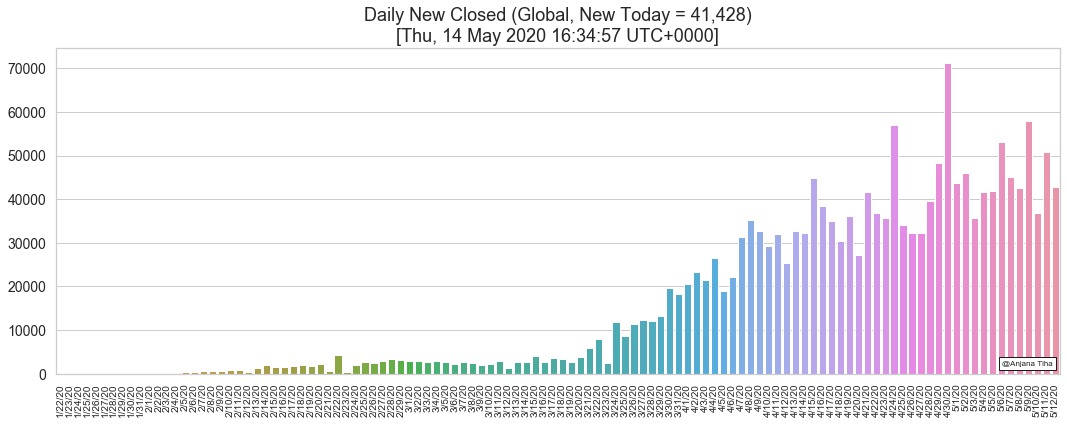

In [18]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize + 4}

plt.rcParams.update(params)



filename = output_visualization_dir_global + "daily_new_confirmed_global.png"    

if os.path.exists(filename):
    os.remove(filename)

ax = sns.barplot(x=data_cols_new_format, y=df_confirmed_total.diff())
plt.title("Daily New Confirmed (Global, New Today = " + f'{df_active_total.diff()[last_day].astype(int):,}'+")" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "daily_new_recovered_global.png"    

if os.path.exists(filename):
    os.remove(filename)

ax = sns.barplot(x=data_cols_new_format, y=df_recovered_total.diff())
plt.title("Daily New Recovered (Global, New Today = " + f'{df_active_total.diff()[last_day].astype(int):,}'+")" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "daily_new_death_global.png"    

if os.path.exists(filename):
    os.remove(filename)


ax = sns.barplot(x=data_cols_new_format, y=df_death_total.diff())
plt.title("Daily New Death (Global, New Today = " + f'{df_active_total.diff()[last_day].astype(int):,}'+")" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "daily_new_active_global.png"    

if os.path.exists(filename):
    os.remove(filename)

ax = sns.barplot(x=data_cols_new_format, y=df_active_total.diff())
plt.title("Daily New Active (Global, New Today = " + f'{df_active_total.diff()[last_day].astype(int):,}'+")" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "daily_new_closed_global.png"    

if os.path.exists(filename):
    os.remove(filename)

ax = sns.barplot(x=data_cols_new_format, y=df_closed_total.diff())
plt.title("Daily New Closed (Global, New Today = " + f'{df_active_total.diff()[last_day].astype(int):,}'+")" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


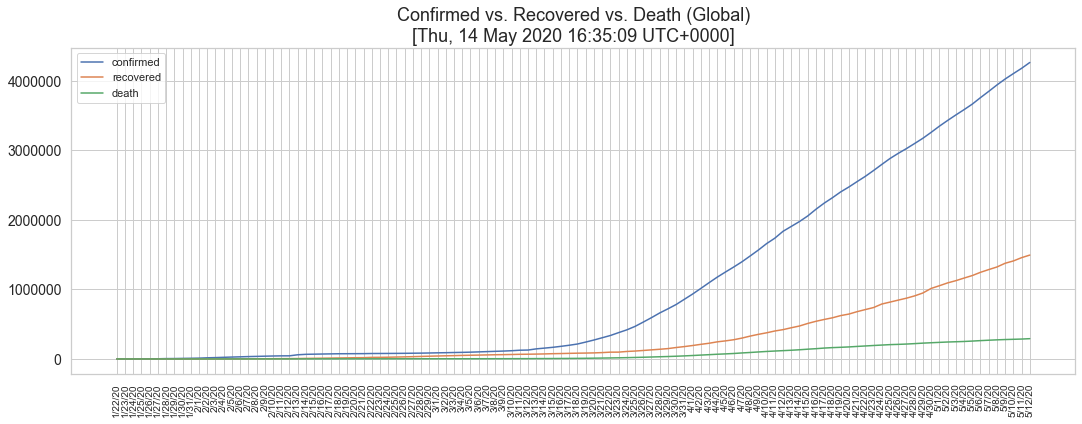

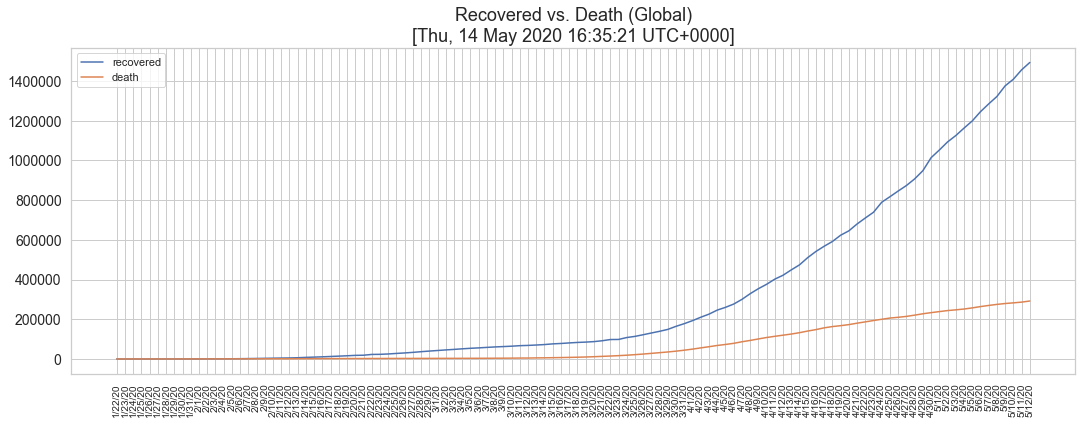

In [19]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize + 4}

plt.rcParams.update(params)



filename = output_visualization_dir_global + "all_global.png"    

if os.path.exists(filename):
    os.remove(filename)

plt.plot(data_cols_new_format, df_confirmed_total, label="confirmed")
plt.plot(data_cols_new_format, df_recovered_total, label="recovered")
plt.plot(data_cols_new_format, df_death_total, label="death")
plt.title("Confirmed vs. Recovered vs. Death (Global)" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
plt.legend()
# text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
# ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "recovered_death_global.png"    

if os.path.exists(filename):
    os.remove(filename)

plt.plot(data_cols_new_format, df_recovered_total, label="recovered")
plt.plot(data_cols_new_format, df_death_total, label="death")
plt.title("Recovered vs. Death (Global)" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
plt.legend()
# text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
# ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()

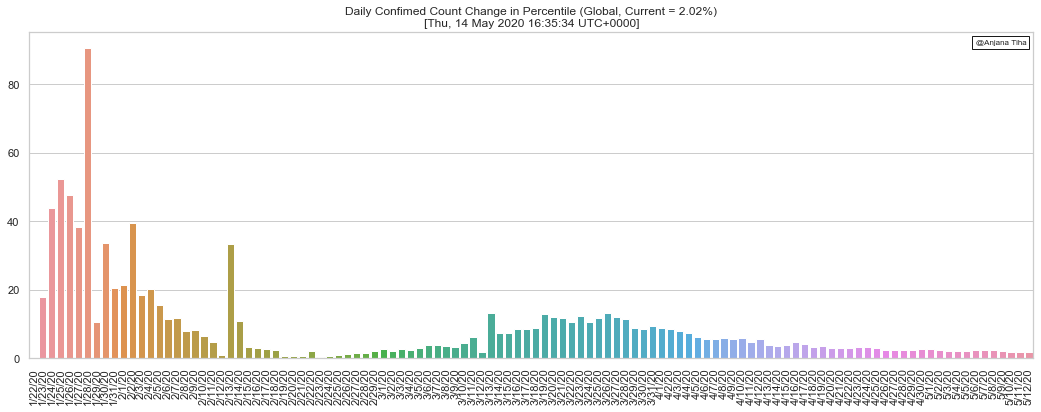

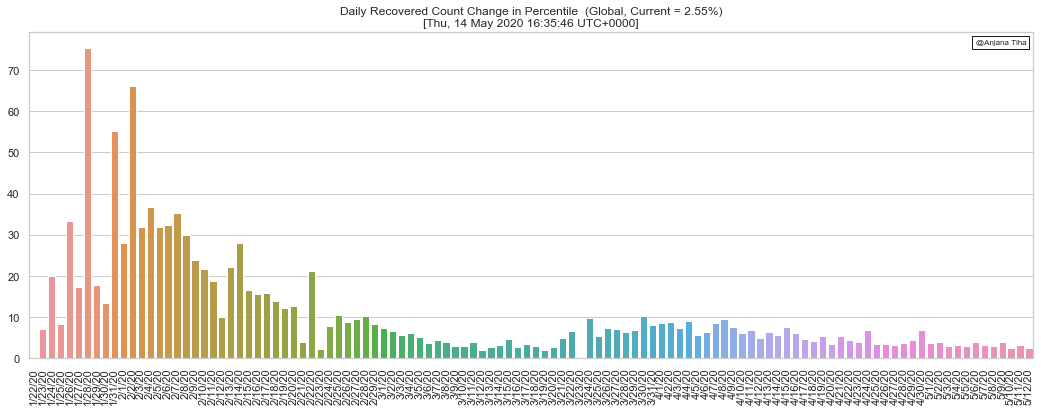

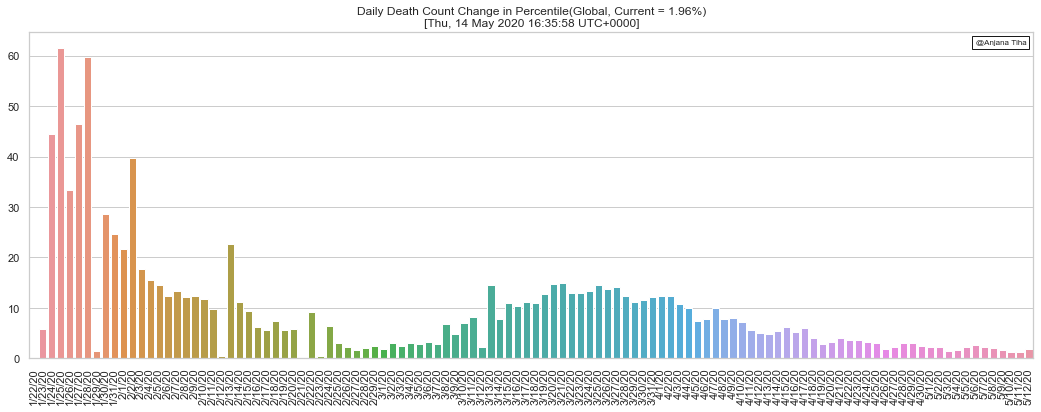

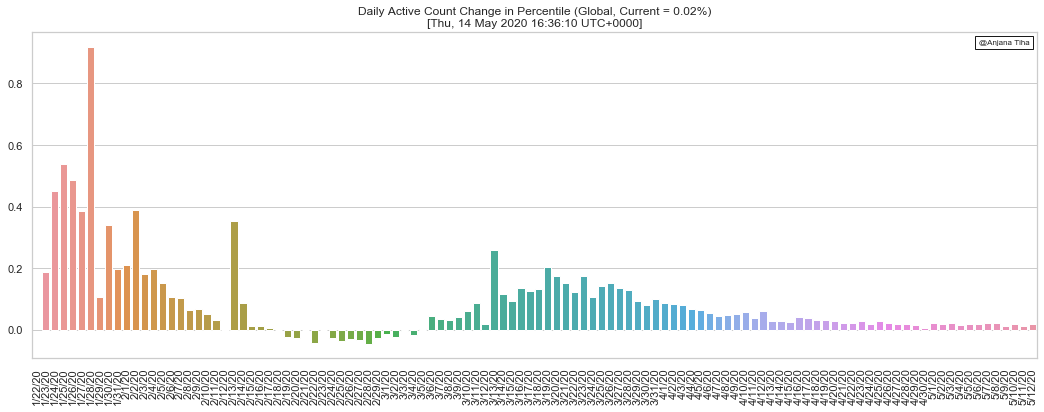

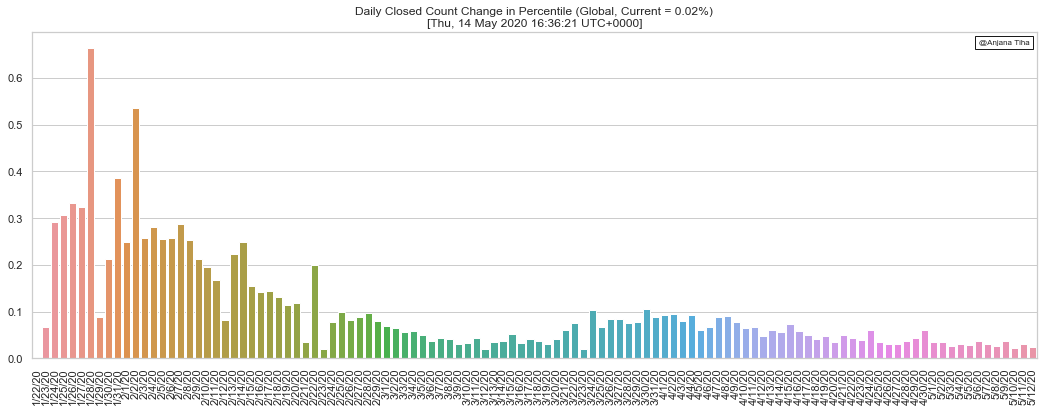

In [20]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize + 4}


filename = output_visualization_dir_global + "confirmed_pct_chng_global.png"    

if os.path.exists(filename):
    os.remove(filename)

df = df_confirmed_pct_1_total
ax = sns.barplot(x=data_cols_new_format, y=df)
plt.title("Daily Confimed Count Change in Percentile (Global, Current = " + "{:.2f}".format(df[last_day]) + "%)" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=1, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "recovered_pct_chng_global.png"    

if os.path.exists(filename):
    os.remove(filename)

df = df_recovered_pct_1_total
ax = sns.barplot(x=data_cols_new_format, y=df)
plt.title("Daily Recovered Count Change in Percentile  (Global, Current = " + "{:.2f}".format(df[last_day]) + "%)" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=1, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()



filename = output_visualization_dir_global + "death_pct_chng_global.png"    

if os.path.exists(filename):
    os.remove(filename)

df = df_death_pct_1_total
ax = sns.barplot(x=data_cols_new_format, y=df)
plt.title("Daily Death Count Change in Percentile(Global, Current = " + "{:.2f}".format(df[last_day]) + "%)" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=1, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()



filename = output_visualization_dir_global + "active_pct_chng_global.png"    

if os.path.exists(filename):
    os.remove(filename)

df = df_active_total.pct_change(periods=1)
ax = sns.barplot(x=data_cols_new_format, y=df)
plt.title("Daily Active Count Change in Percentile (Global, Current = " + "{:.2f}".format(df[last_day]) + "%)" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=1, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "closed_pct_chng_global.png"    

if os.path.exists(filename):
    os.remove(filename)

df = df_closed_total.pct_change(periods=1)
ax = sns.barplot(x=data_cols_new_format, y=df)
plt.title("Daily Closed Count Change in Percentile (Global, Current = " + "{:.2f}".format(df[last_day]) + "%)" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=1, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()



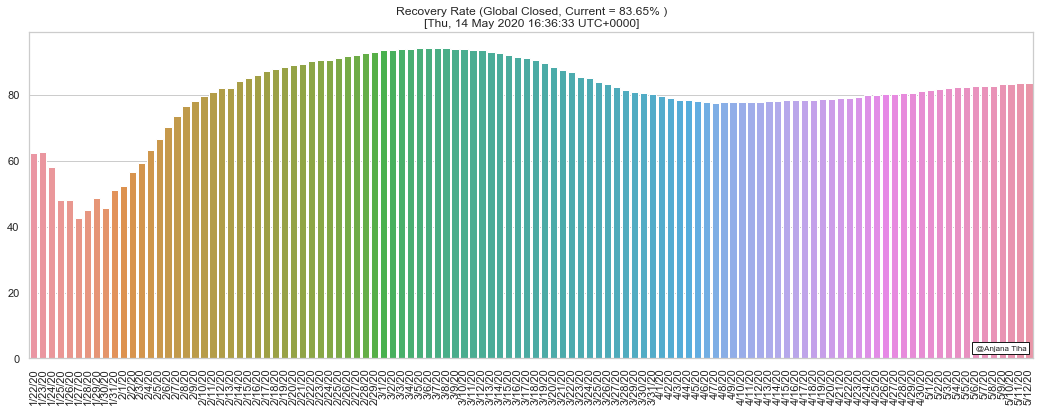

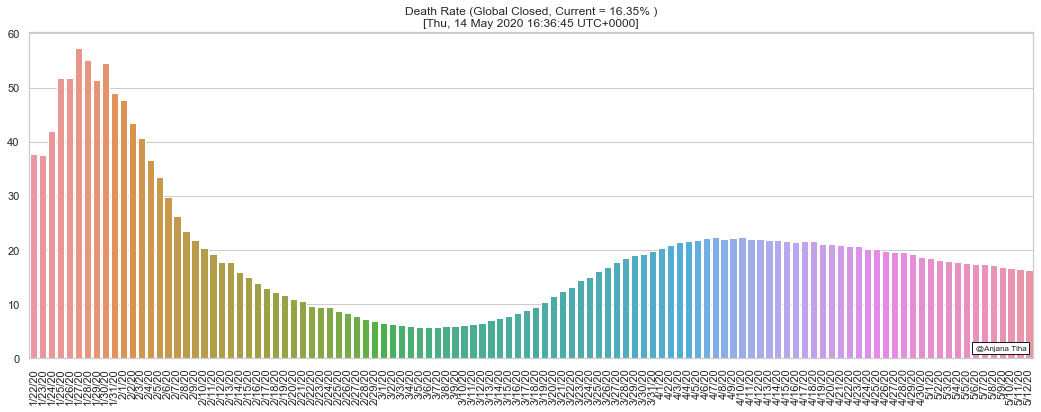

In [21]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize + 4}



filename = output_visualization_dir_global + "recovery_rate_global.png"    

if os.path.exists(filename):
    os.remove(filename)
    
df = df_recovery_rate_closed_total
ax = sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format])
plt.title("Recovery Rate (Global Closed, Current = " + "{:.2f}".format(df[last_day]) + "% )" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


filename = output_visualization_dir_global + "death_rate_global.png"    

if os.path.exists(filename):
    os.remove(filename)

df = df_death_rate_closed_total
ax = sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format])
plt.title("Death Rate (Global Closed, Current = " + "{:.2f}".format(df[last_day]) + "% )" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()



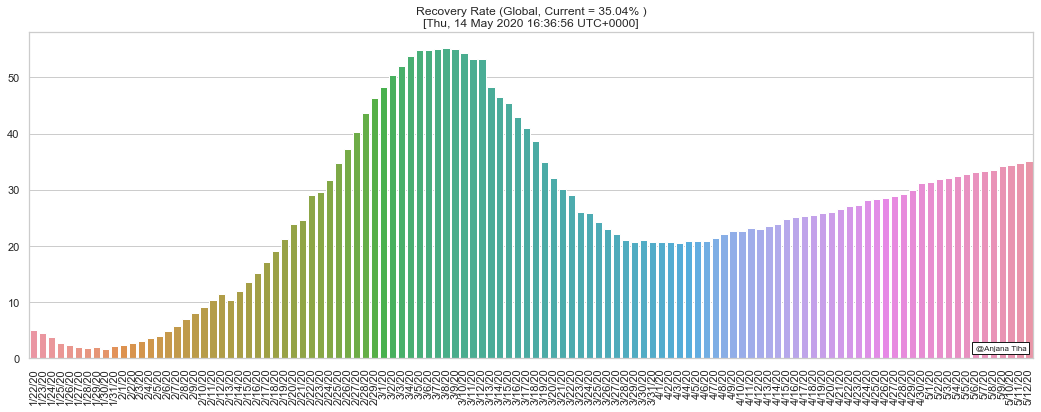

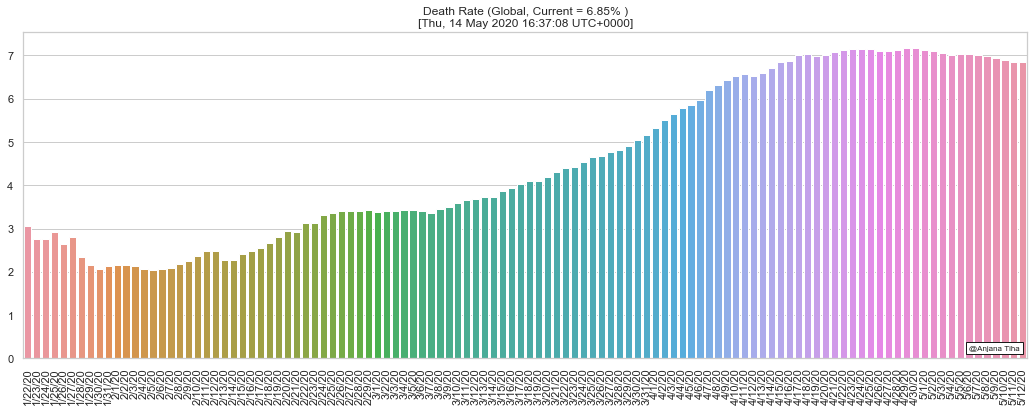

In [22]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize + 4}



filename = output_visualization_dir_global + "cum_recovery_rate_global.png"    

if os.path.exists(filename):
    os.remove(filename)

df = df_recovery_rate_total
ax = sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format])
plt.title("Recovery Rate (Global, Current = " + "{:.2f}".format(df[last_day]) + "% )" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()



filename = output_visualization_dir_global + "cum_death_rate_global.png"    

if os.path.exists(filename):
    os.remove(filename)


df = df_death_rate_total
ax = sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format])
plt.title("Death Rate (Global, Current = " + "{:.2f}".format(df[last_day]) + "% )" + "\n[" + get_cur_time() + "]")
plt.xticks(rotation=90)
text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
ax.add_artist(text)
plt.savefig(filename, bbox_inches="tight")
plt.show()


In [ ]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize + 4}

plt.rcParams.update(params)


for country in countries:
    df = ts_confirmed_global[ts_confirmed_global["Country/Region"]==country]
    
    current_dir = output_visualization_dir_country + re.sub("[^a-zA-Z]", "", country) + "\\"
    filename = current_dir + "confirmed.png"   

    if os.path.exists(filename):
        os.remove(filename)

    ax = sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format].sum())
    plt.title("Total Confirmed = " + f'{df[last_day].sum():,}' + " (" + country + ")" + "\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
    ax.add_artist(text)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    

    df = ts_recovered_global[ts_recovered_global["Country/Region"]==country]
    
    filename = current_dir + "recovered.png"    

    if os.path.exists(filename):
        os.remove(filename)

    ax = sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format].sum())
    plt.title("Total Recovered = " + f'{df[last_day].sum():,}' + " (" + country + ")" + "\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
    ax.add_artist(text)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()

    
    df = ts_deaths_global[ts_deaths_global["Country/Region"]==country]
    
    filename = current_dir + "death.png"    

    if os.path.exists(filename):
        os.remove(filename)

    ax = sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format].sum())
    plt.title("Total Death = " + f'{df[last_day].sum():,}' + " (" + country + ")" + "\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
    ax.add_artist(text)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()


In [ ]:
d = ts_confirmed_global[ts_confirmed_global["Country/Region"]=="Bangladesh"]
d[data_cols_new_format].diff(axis=1)[last_day]

In [ ]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize + 4}

plt.rcParams.update(params)


for country in countries:
    df = ts_confirmed_global[ts_confirmed_global["Country/Region"]==country]
    
    current_dir = output_visualization_dir_country + re.sub("[^a-zA-Z]", "", country) + "\\"
    filename = current_dir + "confirmed_new.png"   

    if os.path.exists(filename):
        os.remove(filename)

    ax = sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format].sum().diff())
    plt.title("Daily New Confirmed - " + country + " (New Today = " + f'{df[data_cols_new_format].sum().diff()[last_day].astype(int):,}' + ")\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
    ax.add_artist(text)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    

    df = ts_recovered_global[ts_recovered_global["Country/Region"]==country]
    
    filename = current_dir + "recovered_new.png"    

    if os.path.exists(filename):
        os.remove(filename)

    ax = sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format].sum().diff())
    plt.title("Daily New Recovered - " + country + " (New Today = " + f'{df[data_cols_new_format].sum().diff()[last_day].astype(int):,}' + ")\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
    ax.add_artist(text)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()

    
    df = ts_deaths_global[ts_deaths_global["Country/Region"]==country]
    
    filename = current_dir + "death_new.png"    

    if os.path.exists(filename):
        os.remove(filename)

    ax = sns.barplot(x=data_cols_new_format, y=df[data_cols_new_format].sum().diff())
    plt.title("Daily New Death - " + country + " (New Today = " + f'{df[data_cols_new_format].sum().diff()[last_day].astype(int):,}' + ")\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
    ax.add_artist(text)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()

    



In [ ]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize + 4}

plt.rcParams.update(params)


for country in countries:

    current_dir = output_visualization_dir_country + re.sub("[^a-zA-Z]", "", country) + "\\"
    
    filename = current_dir + "all.png"    

    if os.path.exists(filename):
        os.remove(filename)

    df = ts_confirmed_global[ts_confirmed_global["Country/Region"]==country]
    plt.plot(data_cols_new_format, df[data_cols_new_format].sum(), label="confirmed")
    
    df = ts_recovered_global[ts_recovered_global["Country/Region"]==country]
    plt.plot(data_cols_new_format, df[data_cols_new_format].sum(), label="recovered")
    
    df = ts_deaths_global[ts_deaths_global["Country/Region"]==country]
    plt.plot(data_cols_new_format, df[data_cols_new_format].sum(), label="death")
    
    plt.title("Confirmed vs. Recovered vs. Death (" + country + ")\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    plt.legend()
#     text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
#     ax.add_artist(text)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()


    filename = current_dir + "recovered_death.png"    

    if os.path.exists(filename):
        os.remove(filename)

    df = ts_recovered_global[ts_recovered_global["Country/Region"]==country]
    plt.plot(data_cols_new_format, df[data_cols_new_format].sum(), label="recovered")
    
    df = ts_deaths_global[ts_deaths_global["Country/Region"]==country]
    plt.plot(data_cols_new_format, df[data_cols_new_format].sum(), label="death")
    
    plt.title("Recovered vs. Death (" + country + ")\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    plt.legend()
    # text = AnchoredText(copyright_text, loc=4, prop={'size': copyright_text_size}, frameon=True)
    # ax.add_artist(text)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()

In [ ]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize + 4}

plt.rcParams.update(params)


for country in countries:

    current_dir = output_visualization_dir_country + re.sub("[^a-zA-Z]", "", country) + "\\"
    
    
    filename = current_dir + "confirmed_pct_chng.png"    

    if os.path.exists(filename):
        os.remove(filename)

    df = ts_confirmed_global[ts_confirmed_global["Country/Region"]==country]
    ax = plt.plot(data_cols_new_format, df[data_cols_new_format].sum().pct_change(periods=1)*100, label="confirmed")
    plt.title("Daily Confirmed Count Change in Percentile (" + country + ")\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    
    
    filename = current_dir + "recovered_pct_chng.png"
    if os.path.exists(filename):
        os.remove(filename)
    
    df = ts_recovered_global[ts_recovered_global["Country/Region"]==country]
    ax = plt.plot(data_cols_new_format, df[data_cols_new_format].sum().pct_change(periods=1)*100, label="recovered")
    plt.title("Daily Recovered Count Change in Percentile (" + country + ")\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    
    
    filename = current_dir + "death_pct_chng.png"
    if os.path.exists(filename):
        os.remove(filename)
        
    df = ts_deaths_global[ts_deaths_global["Country/Region"]==country]
    ax = plt.plot(data_cols_new_format, df[data_cols_new_format].sum().pct_change(periods=1)*100, label="death")
    plt.title("Daily Death Count Change in Percentile (" + country + ")\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()

In [ ]:
sns.set(style="whitegrid")

ticksize = 10
titlesize = ticksize + 8
labelsize = ticksize + 5

figsize = (18, 6)
params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize + 4}

plt.rcParams.update(params)


for country in countries:

    current_dir = output_visualization_dir_country + re.sub("[^a-zA-Z]", "", country) + "\\"
    
    df_confirmed_country = ts_confirmed_global[ts_confirmed_global["Country/Region"]==country]
    df_recovered_country = ts_recovered_global[ts_recovered_global["Country/Region"]==country]
    df_death_country = ts_deaths_global[ts_deaths_global["Country/Region"]==country]
    
    
    filename = current_dir + "death_rate_closed.png"       

    if os.path.exists(filename):
        os.remove(filename)

    df = df_death_country[data_cols_new_format].sum()/(df_recovered_country[data_cols_new_format].sum() + df_death_country[data_cols_new_format].sum())*100
    plt.plot(data_cols_new_format, df[data_cols_new_format])
    plt.title("Death Rate - " + country + " (Closed, Current = " + "{:.2f}".format(df[last_day]) + "% )" + "\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    
    
    filename = current_dir + "recovery_rate_closed.png" 
    if os.path.exists(filename):
        os.remove(filename)

    df = df_recovered_country[data_cols_new_format].sum()/(df_recovered_country[data_cols_new_format].sum() + df_death_country[data_cols_new_format].sum())*100
    plt.plot(data_cols_new_format, df[data_cols_new_format])
    plt.title("Recovery Rate - " + country + " (Closed, Current = " + "{:.2f}".format(df[last_day]) + "% )" + "\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    
    
    filename = current_dir + "death_rate.png"       

    if os.path.exists(filename):
        os.remove(filename)

    df = df_death_country[data_cols_new_format].sum()/df_confirmed_country[data_cols_new_format].sum()*100
    plt.plot(data_cols_new_format, df[data_cols_new_format])
    plt.title("Death Rate - " + country + " (Current = " + "{:.2f}".format(df[last_day]) + "% )" + "\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    
    
    filename = current_dir + "recovery_rate.png" 
    if os.path.exists(filename):
        os.remove(filename)

    df = df_recovered_country[data_cols_new_format].sum()/df_confirmed_country[data_cols_new_format].sum()*100
    plt.plot(data_cols_new_format, df[data_cols_new_format])
    plt.title("Recovery Rate - " + country + " (Current = " + "{:.2f}".format(df[last_day]) + "% )" + "\n[" + get_cur_time() + "]")
    plt.xticks(rotation=90)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
    